In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# 1D

In [3]:
# declare arrays
main = []

nx = 200
nm = 4
x  = np.zeros(nx)
f = np.zeros(nx)
fnew = np.zeros(nx)
# baseline parameters
Nsteps = 10000
nout = 300
sizex = 1.0
dif = 1.0
vel = 0.1

# set Diffusion coefficient to 1
D = 1

# mesh size and CFL numbers checked out by condition
dx = sizex/float(nx-1)
dt = (10**(-5))
delta = D*dt/(dx**2)
a = b = delta
c = 1-2*delta
sigma = 0.5
for i in range(nx):
    x[i] = dx*float(i)
    xj = (x[i]-sizex/2)/sigma
    f[i] = (1.0/sigma)*np.exp(-xj*xj)

# Dirichlet Transfer matrix
tfer = np.diag(c*np.ones(nx),0) + np.diag(a*np.ones(nx-1),-1) + np.diag(b*np.ones(nx-1),1)
tfer[0,:] = 0
tfer[0,0] = 0
tfer[-1,:] = 0
tfer[-1,-1] = 0

tfer
for j in range(Nsteps):
    fnew = np.dot(tfer,f.T)
    f = np.copy(fnew)
    main.append(f)
main = np.array(main)



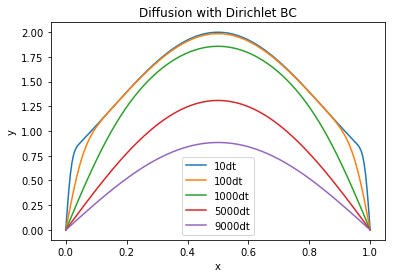

In [4]:
plt.figure()
plt.plot(x,main[10,:],label = '10dt')
plt.plot(x,main[100,:],label='100dt')
plt.plot(x,main[1000,:],label = '1000dt')
plt.plot(x,main[5000,:],label = '5000dt')
plt.plot(x,main[9000,:],label = '9000dt')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Diffusion with Dirichlet BC')

# 2D

In [8]:
# declare arrays
nx = 200
ny = 200
x  = np.zeros(nx)
y = np.zeros(ny)
f = np.zeros((nx,ny))
fnew = np.zeros((nx,ny))


# baseline parameters
Nsteps = 100
sizex = 1.0
sizey = 1.0
main = np.zeros(((Nsteps+1,nx,nx)))

# set Diffusion coefficients to 1
Dx = 1
Dy = 1

# mesh size and CFL numbers checked out by condition
dx = sizex/float(nx-1)
dy = sizey/float(ny-1)
dt = (10**(-5))
deltax = 1.0*dt/(dx**2)
deltay = 1.0*dt/(dy**2)
ax = bx = deltax
cx = 1.-2*deltax
ay = by = deltay
cy = 1.-2*deltay

sigmax = 0.2
sigmay = 0.2
for i in range(nx):
    x[i] = dx*float(i)
    xj = (x[i]-sizex/2.0)/sigmax
    for j in range(ny):
        y[j] = dy*float(j)
        yj = (y[j] - sizey/2.0)/sigmay
        f[i,j] = ((1.0/sigmax)*np.exp(-xj*xj))*(1.0/sigmay)*np.exp(-yj*yj)
fnew = np.copy(f)
main[0,:,:] = fnew
# # Dirichlet conditions
# fnew[:,0] = np.copy(f[:,0])
# fnew[0,:] = np.copy(f[0,:])
# fnew[:,-1] = np.copy(f[:,ny-1])
# fnew[-1,:] = np.copy(f[nx-1,:])
# fnew = np.copy(f)

# # fnew[:,0] = 0
# # fnew[0,:] = 0
# # fnew[:,-1] = 0
# # fnew[-1,:] = 0
# main.append(fnew)
for j in range(Nsteps):
    for i in range(nx-2):
        for k in range(ny-2):
            fnew[i+1,k+1] = f[i+1,k+1] + deltax*f[i+1,k]+deltax*f[i+1,k+2]-4*deltax*f[i+1,k+1] + deltax*f[i,k+1] + deltax*f[i+2,k+1]
    f = np.copy(fnew)
    main[j+1,:,:]=np.copy(fnew)



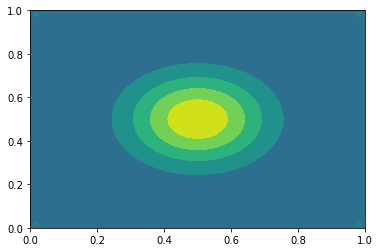

In [19]:
X,Y = np.meshgrid(x,y)
plt.figure()
plt.contourf(X,Y,main[0,:,:])


In [289]:
len(main)


100

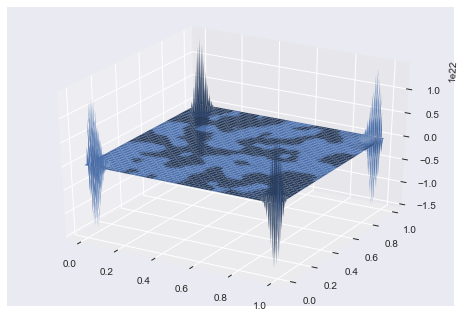

In [318]:
X,Y = np.meshgrid(x,y)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,main[0])


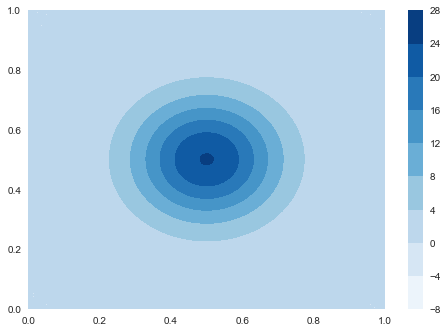

In [303]:
plt.contourf(X,Y,main[32],cmap ='Blues')
plt.colorbar()

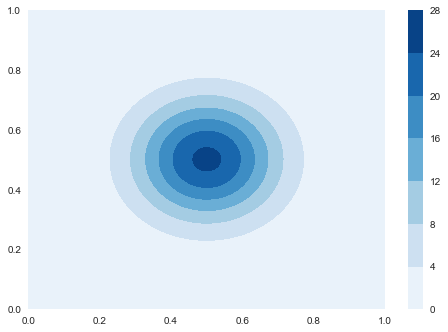

In [273]:
plt.contourf(X,Y,main[2],cmap ='Blues')
plt.colorbar()

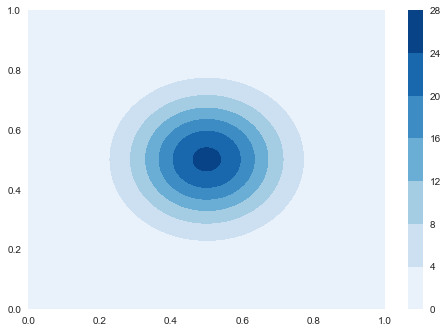

In [274]:
plt.contourf(X,Y,main[3],cmap ='Blues')
plt.colorbar()

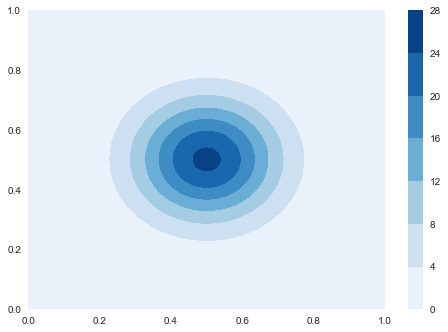

In [275]:
plt.contourf(X,Y,main[4],cmap ='Blues')
plt.colorbar()

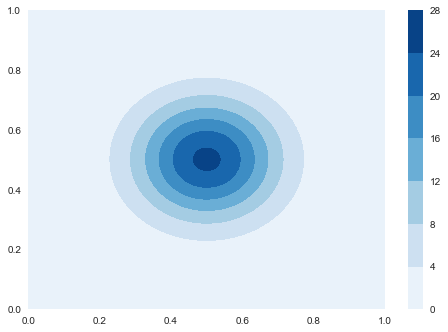

In [276]:
plt.contourf(X,Y,main[5],cmap ='Blues')
plt.colorbar()

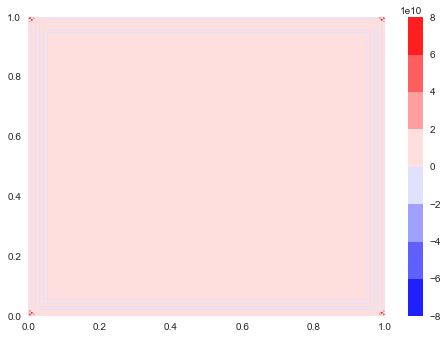

In [245]:
plt.contourf(X,Y,main[10],cmap ='bwr')
plt.colorbar()